# Global and Los Angeles Weather Trends

This notebook uses historical temperarture data to compare global weather trends and Los Angeles weather trends. I utilized the available data set as follows:
- Cleaned and Exported Data Sets to CSV
    - Reviewed SQL Database to determine data to export
    - Exported Los Angeles Temperature CSV Data from SQL Database
    - Exported Global Temperarture CSV Data from SQL Database
- Imported Data as Pandas Dataframes
    - Imported and Converted global.csv to Pandas Dataframe
    - Calculated Moving Average and Concatenated Column to global_df
    - Imported and Converted losangeles.csv to Pandas Dataframe
    - Calculated Moving Average and Concatenated Column to la_df
- Plotted Data with MatPlotLib
    - Plotted Global Temperature Change
    - Plotted Los Angeles Temperature Change
    - Plotted Global Temperature Change Since 1849
    - Plotted Los Angeles and Global Temperature Change
- Documented observations from Line Charts

## Cleaning and Exporting the Data Set

The data used for this topic came from following three tables:

- `global_data`
    - Contains the average global temperature for each recorded year
    
- `city_list`
    - Contains a list of cities of countries
    
- `city_data`
    - Contains the average city temperature for each recorded year

The global_data table contained only two columns, _year_ and _avg_temp_. As a result I used a simple query (listed below) to pull all the columns from this table as both columns are needed to calculate the moving change over time. I exported this table as the csv file: global.csv.<br>


```
select *
from global_data
```

The city_list contained the foreign key _city_ to the city_data table. I used the following query to determine if Los Angeles was a unique city name in this data set.<br>


```
select year, avg_temp
from city_list
where city = 'Los Angeles'
```

The data returned from the city_list query confirmed that Los Angeles was not unique, appearing as a city in both the United States and Chile. As a result I ensured that the query for city_data specified the country, United States, as well as the city, Los Angeles, in order to only pull the data I needed.<br>

However, while I specified the city and country in the where clause of my query, I only selected the _year_ and _avg_temp_ columns in my select statement as the _city_ and _country_ columns are not necessary for my data set. The below query was used to pull city_data as the csv file: losangeles.csv.<br>

```
select year, avg_temp
from city_data
where city = 'Los Angeles' and country = 'United States'
```

## Import Data as Pandas Dataframes

In [3]:
import pandas as pd

In [4]:
# Create pandas dataframe for the global.csv file
# Display the first five rows of the dataframe.
global_df = pd.read_csv (r'global.csv')
global_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [5]:
# Create pandas dataframe for the losangeles.csv file
# Display the first five rows of the dataframe.
la_df = pd.read_csv (r'losangeles.csv')
la_df.head()

,year,avg_temp
0,1849,15.71
1,1850,15.28
2,1851,15.53
3,1852,15.61
4,1853,16.27


## Computing Moving Average
- Concatenate to DataFrame: `https://www.datacamp.com/community/tutorials/moving-averages-in-pandas`

In [6]:
from typing import List

def compute_moving_avg(temps: List) -> List:
    '''Computes moving average over a list of values with window size of 2'''
    mov_avg = []
    for idx, val in enumerate(temps):
        if idx == 0:
            avg = val
        else:
            avg = (val + temps[idx-1])/2
        mov_avg.append(avg)
    return mov_avg

In [7]:
# add moving average to global_df
global_df['mov_avg'] = compute_moving_avg(global_df.avg_temp)

In [8]:
global_df.head()

,year,avg_temp,mov_avg
0,1750,8.72,8.720
1,1751,7.98,8.350
2,1752,5.78,6.880
3,1753,8.39,7.085
4,1754,8.47,8.430


In [9]:
# add moving_average to la_df
la_df['mov_avg'] = compute_moving_avg(la_df.avg_temp)

In [10]:
la_df.head()

,year,avg_temp,mov_avg
0,1849,15.71,15.710
1,1850,15.28,15.495
2,1851,15.53,15.405
3,1852,15.61,15.570
4,1853,16.27,15.940


## Plot Data Sets with Matplotlib
- Label axes: `jonathansoma.com/lede/data-studio/matplotlib/labeling-your-axes-in-pandas-and-matplotlib/`

In [11]:
import matplotlib.pyplot as plt

In [12]:
def graph_mov_avg(df: pd.DataFrame, title: str) -> None:
    # Define and title graph to display
    # Set x and y coordinates from pandas dataframe


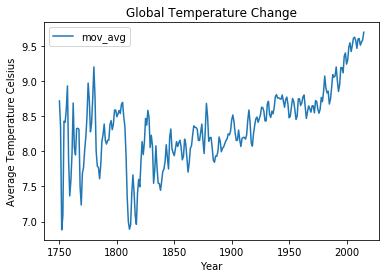

In [13]:
graph_mov_avg(df=global_df, title='Global Temperature Change')

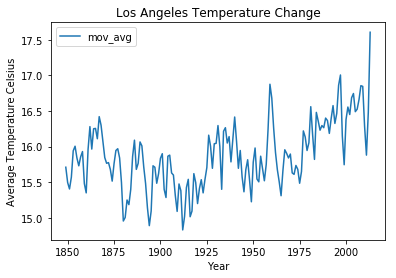

In [14]:
graph_mov_avg(df=la_df, title='Los Angeles Temperature Change')

## Plot on Same Graph
- Merge Dataframes: `https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/`
- Rename Columns: `https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html`
- Drop Columns: `https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html`
- Plot Multiple Lines: `https://stackoverflow.com/questions/29233283/plotting-multiple-lines-with-pandas-dataframe`

In [23]:
# combine the two dfs into a single df
combined_df = pd.merge(global_df, la_df, on='year', how='outer')

In [24]:
# rename merged columns
combined_df = combined_df.rename(columns={'avg_temp_x': 'global_avg_temp', 'mov_avg_x': 'global_mov_avg', 
                                          'avg_temp_y': 'LA_avg_temp', 'mov_avg_y': 'LA_mov_avg'})

In [25]:
# subset df to years and mov_avg columns
combined_df = combined_df[['year', 'global_mov_avg', 'LA_mov_avg']]

In [26]:
#rename columns one more time for graphing
combined_df = combined_df.rename(columns={'year':'Year', 'global_mov_avg': 'Global', 'LA_mov_avg':'LA'})

In [28]:
# for plotting, move year to index and drop column
combined_df.index = combined_df['Year']
combined_df = combined_df.drop(columns=['Year'])

Text(0,0.5,'Average Temperature Celsius')

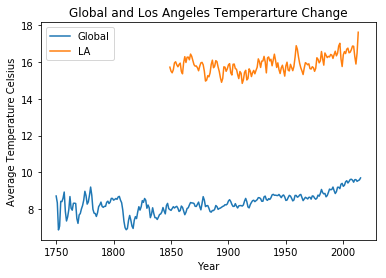

In [43]:
# plot df
gla_df = combined_df.plot(title = 'Global and Los Angeles Temperarture Change')
gla_df.set_ylabel("Average Temperature Celsius")

## Observations

Based on the line charts plotted from the Global and Los Angeles data sets above the following conclusions can be drawn:</b>

1. From 1849 on, Los Angeles temperature changes were much more volatile from year to year than global temperature changes during the same period. 
1. The global temperature from 1750 to 1849 had more extreme shifts in temperature than any point for both the Los Angeles and global data set after 1849. 
1. The average Los Angeles temperarture is almost twice the average Global temperature with Los Angeles temperatures ranging between 15 to 17 degrees as opposed to 7 to 9.5 degrees for Global temperatures. 
1. Both the Los Angeles and global temperatures are increasing on an upward trend. 
1. Since 1849, Los Angeles is much more prone to downward shifts in temperature than global temperature is.
1. The global data set appears to have a stronger positive correlation between the increasing temperature rate and increasing years than the Los Angeles data set.</b>



More in-depth discussion about the above observations:

- The Global data set has a little over 100 years of additional temperature data than the Los Angeles data set (1750-1849 and 2014-2015). From 1750 to 1849, the global temperature was much more prone to downward shifts in temperature than any subsequent year. During this period before 1849, the moving average temperature shifted up and down in excess of 1 degree celius in seven different years. In comparison, of the years after 1849 the moving average temperature never shifted more than 1 degree celcius and only reached a shift close to 1 degree a single time. It is apparent from the data that the more extreme shifts in Global temperature from 1750 to 1849 do not occur in later years. Instead, there is a clear positive correlation years past and increasing global temperature.</b>

- Compared to the Global data set from 1849 to 2015, the Los Angeles data set appears to have a much higher variance in temperature shifts during this period. The Los Angeles average temperature shifts by about 1 degree celsius between six different years and the rate of change seems to be much higher from year to year than the global temperature. While the global temperature gradually trends upward, the Los Angeles temperature spikes up and down, increasing in a much more volatile way. It is clear that Los Angeles temperature is also on an upward trend, but with a much weaker correlation in increasing temperature to years past than the global data set.</b>

- The Global data set has a much lower average temperature than the Los Angeles data set. While the range of temperature for the global data set spans from 7 to 9.5 degrees celsius, the Los Angeles range is almost double that, spanning from 15 to 17 degrees. Despite the extreme temperature disparity, the global temperature actually appears to increase more than the Los Angeles temperature by 1.5 degrees celsius compared to a little under 1 degree respectively.</b> 